# Run This Cell to get the latest course materials (IMPORTANT-BACKUP YOUR CURRENT FILES FIRST)

In [7]:
!git pull

Already up to date.


# Open Dashboard
- Run the cell below
- Type E-Mail and Password
- Click "LOG IN" button
- Select Device

In [2]:
import aithaigen_hwdashboard
dashboard = aithaigen_hwdashboard.HWDashBoardWidget()
dashboard

HWDashBoardWidget(devices=[('None', 'none')])

# Save data to csv file

In [6]:
import pandas as pd

## For example, if you name the data as collection-1 to 4
data1 = pd.DataFrame.from_dict(dashboard.data['collection-1'])
data2 = pd.DataFrame.from_dict(dashboard.data['collection-2'])
data3 = pd.DataFrame.from_dict(dashboard.data['collection-3'])
data4 = pd.DataFrame.from_dict(dashboard.data['collection-4'])
data = pd.concat([data1, data2, data3, data4])

pd.DataFrame.from_dict(data).to_csv('farm.csv')

In [5]:
data

,timeStamp,light,moisture,class
0,1646111731665,0.635742,0.019531,class-1
1,1646111732665,0.632812,0.018555,class-1
2,1646111733665,0.636719,0.017578,class-1
3,1646111734665,0.638672,0.017578,class-1
4,1646111735665,0.645508,0.017578,class-1
5,1646111736666,0.650391,0.019531,class-1
0,1646111745665,0.548828,0.027344,class-2
1,1646111746665,0.543945,0.026367,class-2
2,1646111747665,0.541016,0.026367,class-2
3,1646111748665,0.536133,0.026367,class-2


# Import Libraries

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score        # Accuracy metrics


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Prepare Input Data

In [63]:
data = pd.read_csv("farm.csv").drop(["timeStamp", "Unnamed: 0"], axis=1)  # read csv file

X = data.drop('class', axis=1) # collect only input data

y_num, conditions = pd.factorize(data['class'], sort=True) # Change classes to numerical data

y = to_categorical(y_num).astype(int) # one of N representation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234) # Split data into train and test

In [1]:
X_train

NameError: name 'data' is not defined

# Train Model
<img src="NN2.jpg"/>

In [29]:
model = Sequential()
model.add(Dense(5, activation='relu'))                      # Hidden layer
model.add(Dense(actions.shape[0], activation='softmax'))    # Output layer

model.compile(optimizer='Adam', loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])

model.fit(X_train, y_train, epochs=200)

model.summary()

Epoch 1/200
2/2 [==============================] - 0s 2ms/step - loss: 1.1095 - categorical_accuracy: 0.2857
Epoch 2/200
2/2 [==============================] - 0s 2ms/step - loss: 1.1071 - categorical_accuracy: 0.2857
Epoch 3/200
2/2 [==============================] - 0s 2ms/step - loss: 1.1037 - categorical_accuracy: 0.2857
Epoch 4/200
2/2 [==============================] - 0s 1ms/step - loss: 1.1014 - categorical_accuracy: 0.2857
Epoch 5/200
2/2 [==============================] - 0s 1ms/step - loss: 1.0991 - categorical_accuracy: 0.2857
Epoch 6/200
2/2 [==============================] - 0s 2ms/step - loss: 1.0965 - categorical_accuracy: 0.2857
Epoch 7/200
2/2 [==============================] - 0s 2ms/step - loss: 1.0939 - categorical_accuracy: 0.2857
Epoch 8/200
2/2 [==============================] - 0s 2ms/step - loss: 1.0917 - categorical_accuracy: 0.2857
Epoch 9/200
2/2 [==============================] - 0s 2ms/step - loss: 1.0899 - categorical_accuracy: 0.2857
Epoch 10/200
2/2 [=

# Test Model
<img src="confusion_matrix.jpg"/>

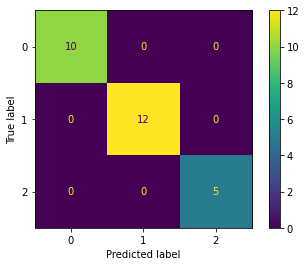

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

# ======================== Test Model ========================================
y_prob = model.predict(X_test)
# =============================================================================


ytrue = np.argmax(y_test, axis=1).tolist() # target class
yhat = np.argmax(y_prob, axis=1).tolist()  # output class

cfm = multilabel_confusion_matrix(ytrue, yhat)


ConfusionMatrixDisplay.from_predictions(ytrue, yhat)

In [31]:
accuracy_score(ytrue, yhat)

1.0

# Save Model

In [35]:
model.save('action') 

INFO:tensorflow:Assets written to: action/assets


# Load Model

In [36]:
from tensorflow.keras.models import load_model

model = load_model('action')

# Use Model in Realtime

In [45]:
# Represents light intensity values
pump_actions = np.array([0.5, 0.0, 1.0])

test_data = pd.DataFrame.from_dict([dashboard.latest_smartfarm_data]).drop('timeStamp', axis=1)

y = model.predict(test_data)

print(conditions[np.argmax(y)])

dashboard.set_light_intensity(pump_actions[np.argmax(y)])


sunny


{'timeStamp': 1646108642672, 'light': 0.461914063, 'moisture': 0.002929688}